In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
res = pd.read_csv('results_converged.csv')
res

,rep_i,result_name,c_reward,crashed,landed,mean_landing_time,mean_fuel_consumption
0,0,Heuristic,500.99,0.1,98.4,171.59,24.66
1,0,Pretrained,504.71,0.0,99.5,171.25,24.69
2,0,RL epoch 1,270.76,0.0,0.0,NaN,34.38
3,0,RL epoch 2,260.35,0.0,0.0,NaN,34.45
4,0,RL epoch 3,264.64,0.0,0.0,NaN,34.52
5,0,RL epoch 4,532.73,0.5,97.5,167.11,24.06
6,0,RL epoch 5,574.35,0.5,95.5,161.32,22.63
7,4,Heuristic,501.39,0.0,97.1,171.11,24.67
8,4,Pretrained,494.09,0.0,96.0,171.96,24.71
9,4,RL epoch 1,525.75,0.0,97.5,168.10,24.18


In [11]:
def extract_varofint(var_of_interst):
    heur = res[res['result_name'] == 'Heuristic' ].sort_values('rep_i')[var_of_interst].tolist()
    pt   = res[res['result_name'] == 'Pretrained'].sort_values('rep_i')[var_of_interst].tolist()
    rl5  = res[res['result_name'] == 'RL epoch 5'].sort_values('rep_i')[var_of_interst].tolist()
    data = [heur, pt, rl5]

    means = [np.mean(x) for x in data]
    stds = [np.std(x) for x in data]

    return means, stds

In [31]:
means, stds = extract_varofint('landed')
print(means)
print(stds)

[97.64, 98.3, 95.4]
[0.4963869458396392, 1.3638181696985856, 3.5972211497209896]


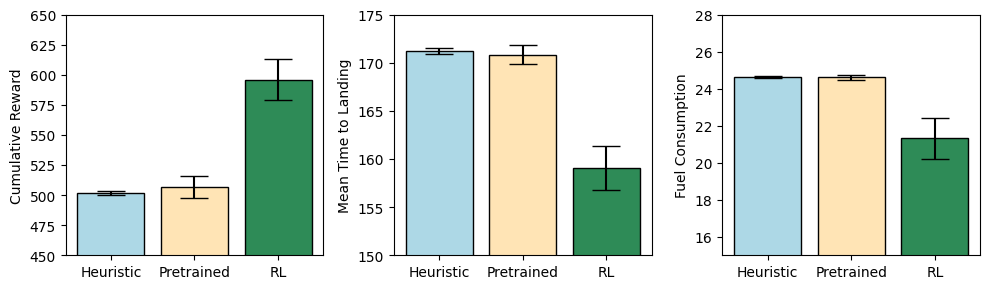

In [39]:


labels = ['Heuristic', 'Pretrained', 'RL']
colors = ['lightblue', 'moccasin', 'seagreen']


fig, axs = plt.subplots(1, 3, figsize=(10, 3))
means, stds = extract_varofint('c_reward')
axs[0].bar(labels, means, yerr=stds, capsize=10, color=colors, linewidth=1, edgecolor='black')
axs[0].set_ylabel('Cumulative Reward')
axs[0].set_ylim((450, 650))

means, stds = extract_varofint('mean_landing_time')
axs[1].bar(labels, means, yerr=stds, capsize=10, color=colors, linewidth=1, edgecolor='black')
axs[1].set_ylabel('Mean Time to Landing')
axs[1].set_ylim((150, 175))

means, stds = extract_varofint('mean_fuel_consumption')
axs[2].bar(labels, means, yerr=stds, capsize=10, color=colors, linewidth=1, edgecolor='black')
axs[2].set_ylabel('Fuel Consumption')
axs[2].set_ylim((15, 28))

plt.tight_layout()
plt.savefig('mbrl_results.pdf')
plt.show()